In [ ]:
# 1. Thêm các thư viện cần thiết   
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Tải dữ liệu
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 3.1 Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [5]:
# 3.2 Danh sách các cột input
cols_eda = df.columns[:-1]
cols_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

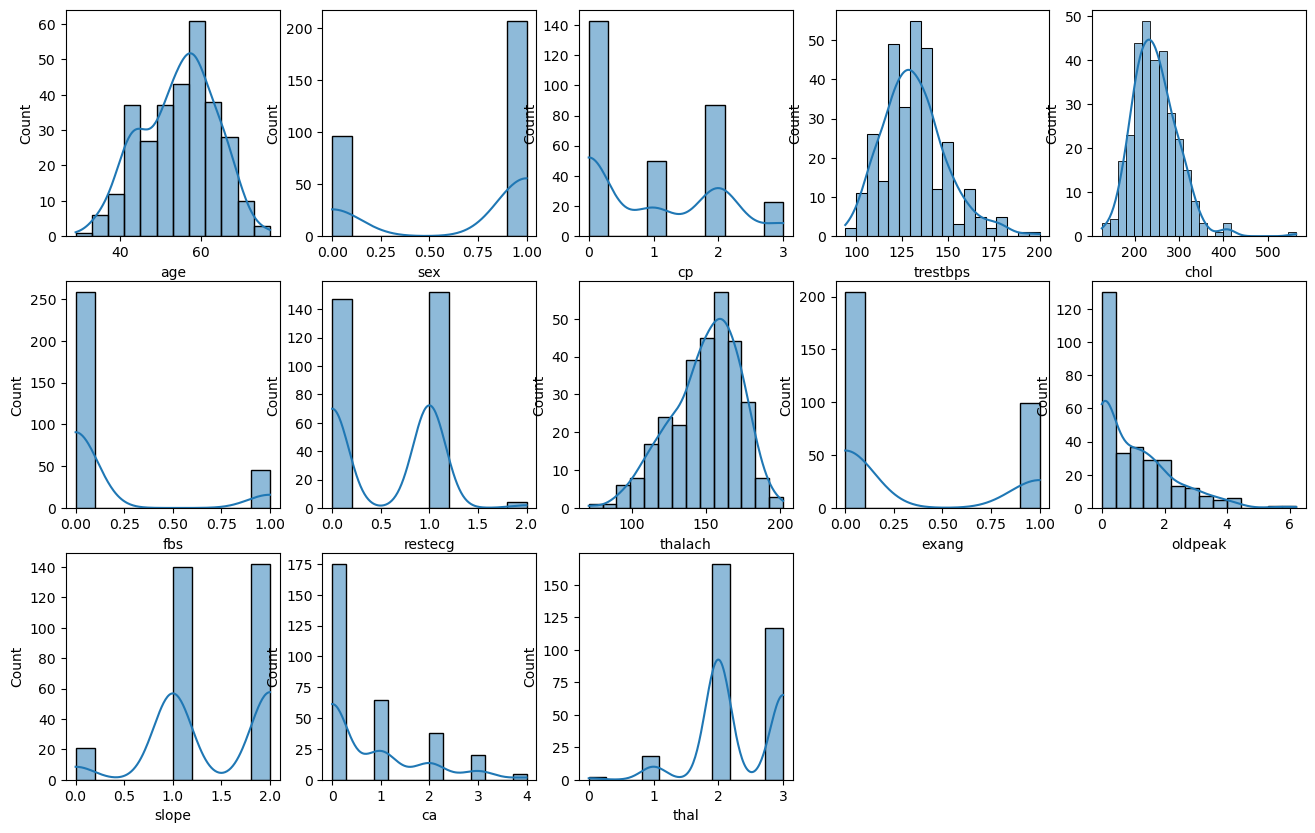

In [6]:
#3.3 Phân tích phân phối các biến số input
fig = plt.figure(figsize=(16,10))

for i in range(len(cols_eda)):
    col = cols_eda[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data = df, x= col, kde=True)

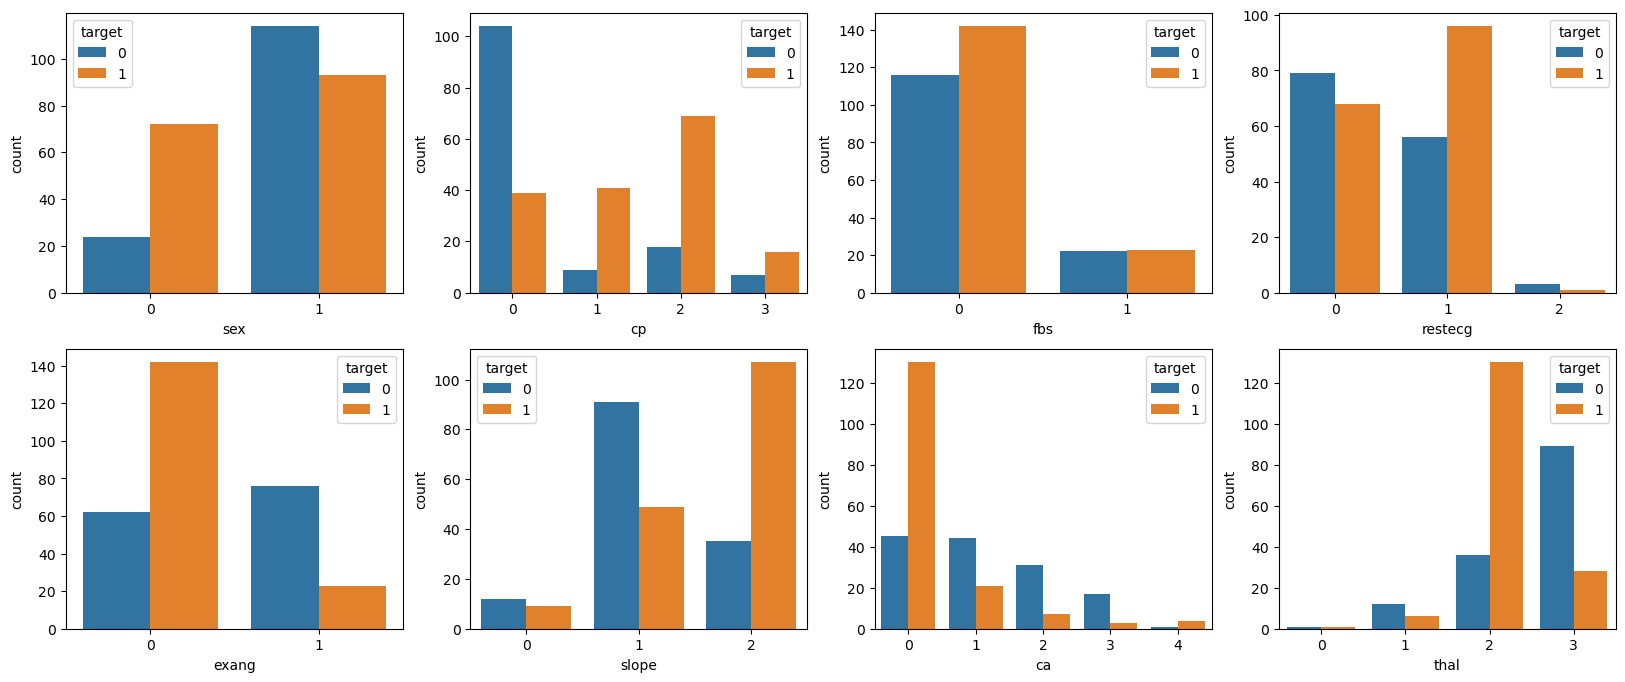

In [ ]:
# 3.4 Đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    col = categories_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.countplot(data = df, x= col, hue="target")

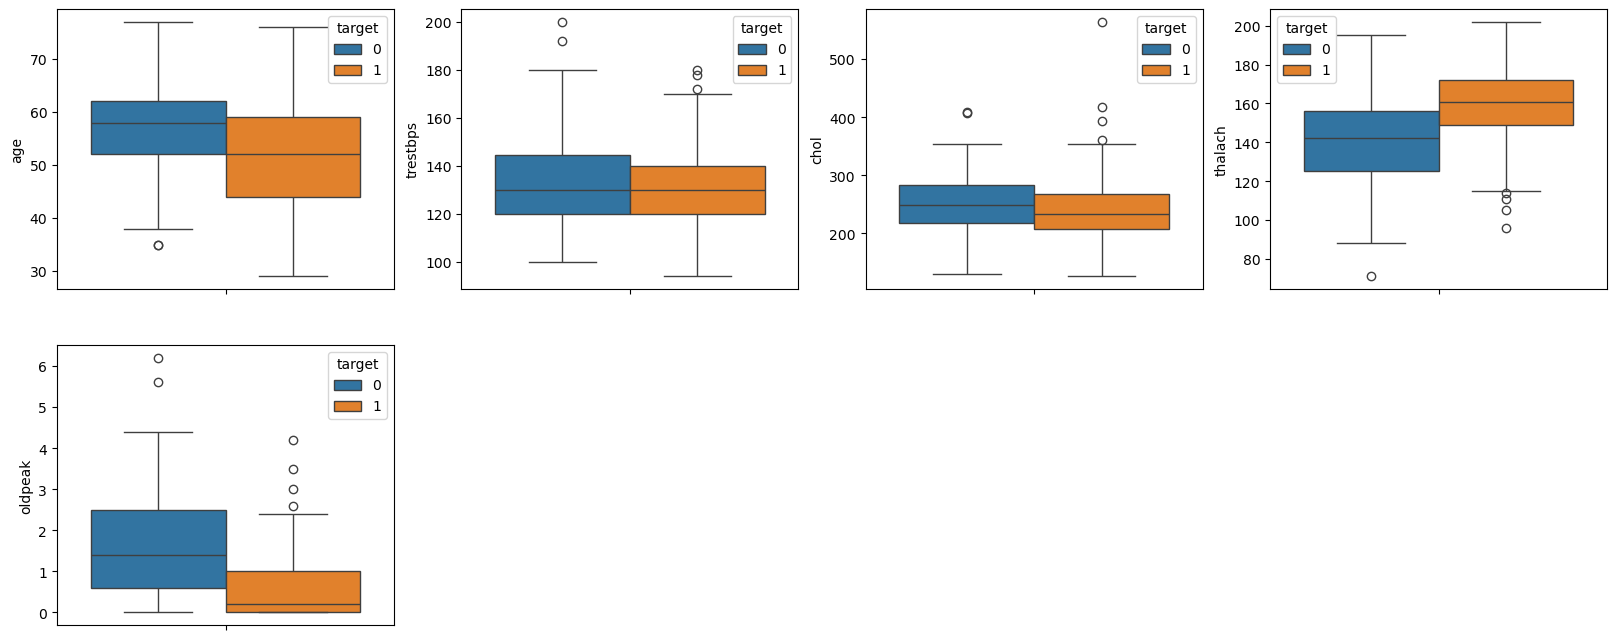

In [10]:
# 3.5 Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    col = numeric_list[i]
    sub = fig.add_subplot(2,4,i+1)
    sns.boxplot(data = df, y= col, hue="target")

In [11]:
# 4 Xây dựng mô hình
# 4.1 Chuẩn bị dữ liệu
X = df.iloc[:,:-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [12]:
# 4.2 Phân chia tập dữ liệu thành hai phần train và test tỉ lệ 80:20 và hệ số random là 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df.index,
                                                                                 test_size=0.2, random_state=42)

In [14]:
# 4.3 Hiển thị danh sách 5 dòng cuối cùng trong tập X_test và y_test
print(X_test[0:5])
print(y_test[0:5])

[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [15]:
# 4.4 Hiển thị danh sách index của các sample trong tập X_train, y_train
print(indices_train)
print(indices_test)

Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)
Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [16]:
# 4.5 Huấn luyện mô hình
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm="brute", metric='minkowski')
knnModel.fit(X_train,y_train)

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [17]:
# 4.6 Đánh giá mô hình trên tập dữ liệu train và test bằng độ đo accuracy
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7603305785123967
0.6885245901639344


In [18]:
# 5. Hperparameter tuning model with Grid Search
# Sử dụng độ đo dnahds gái accuracy trên tập train và test để so sánh
# Trả lời câu hỏi lựa chọn K bao nhiêu là tốt nhất cho mô hình K-NN

Number of candidates: 20
0/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
1/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
2/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
3/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344
4/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
5/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
6/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
7/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
8/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5} 

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

10/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
11/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
12/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
13/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344
14/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
15/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
16/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
17/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
18/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

<function matplotlib.pyplot.show(close=None, block=None)>

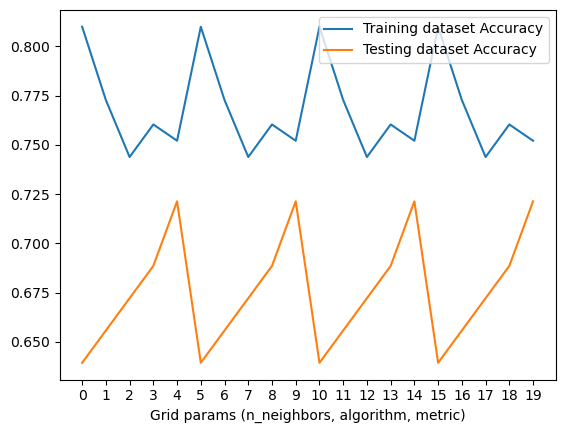

In [20]:
# 5.1 Sử dụng Grid-Search với nhiều hyper-parameter
from sklearn.model_selection import ParameterGrid
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': range(2,7), 'algorithm': ['ball_tree', 'kd_tree'], 'metric': ['euclidean', 'minkowski']}
param_candidates = ParameterGrid(param_grid)
print(f'Number of candidates: {len(param_candidates)}')
results = []
for i, params in enumerate(param_candidates):
    model = estimator.set_params(**params)
    model.fit(X_train, y_train)
    score_train = model.score(X_train,y_train)
    score_test = model.score(X_test,y_test)
    results.append([params, score_train, score_test])
    print(f'{i}/{len(param_candidates)-1}: ', params, score_train, score_test)
print(results)
print(f'Max score on train: {max(results, key=lambda x: x[1])}')
print(f'Max score on test: {max(results, key=lambda x: x[2])}')
list_index_on_results= range(len(results))
list_score_on_train = [x[1] for x in results]
print(list_score_on_train)
list_score_on_test = [x[2] for x in results]
print(list_score_on_test)

plt.plot(list_index_on_results, list_score_on_train, label='Training dataset Accuracy')
plt.plot(list_index_on_results, list_score_on_test, label='Testing dataset Accuracy')
plt.legend()
plt.xlabel('Grid params (n_neighbors, algorithm, metric)')
plt.xticks(range(len(results)),range(len(results)))
plt.show

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

K = 1, Train score: 1.0, Test score: 0.6229508196721312
K = 2, Train score: 0.8099173553719008, Test score: 0.639344262295082
K = 3, Train score: 0.7727272727272727, Test score: 0.6557377049180327
K = 4, Train score: 0.743801652892562, Test score: 0.6721311475409836
K = 5, Train score: 0.7603305785123967, Test score: 0.6885245901639344
K = 6, Train score: 0.7520661157024794, Test score: 0.7213114754098361
K = 7, Train score: 0.743801652892562, Test score: 0.7049180327868853
K = 8, Train score: 0.7231404958677686, Test score: 0.6885245901639344
K = 9, Train score: 0.71900826446281, Test score: 0.6885245901639344
K = 10, Train score: 0.6942148760330579, Test score: 0.7049180327868853
K = 11, Train score: 0.7272727272727273, Test score: 0.7540983606557377
K = 12, Train score: 0.6983471074380165, Test score: 0.7377049180327869
K = 13, Train score: 0.6900826446280992, Test score: 0.7377049180327869
K = 14, Train score: 0.6942148760330579, Test score: 0.7377049180327869
K = 15, Train score: 

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

K = 24, Train score: 0.6735537190082644, Test score: 0.7213114754098361


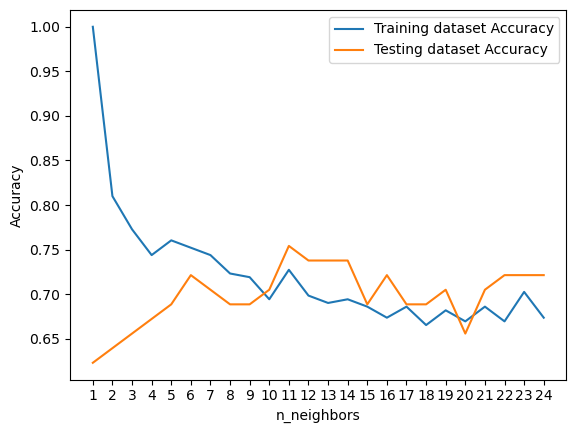

In [22]:
# 5.2 Sử dụng tham số K để dò giá trị K tốt nhất
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

    print(f'K = {k}, Train score: {train_accuracy[i]}, Test score: {test_accuracy[i]}')

plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.xticks(np.arange(1, 25), np.arange(1, 25))
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# 6. Xây dựng lại mô hình với K là tốt nhất
knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(X_train,y_train)

c:\Users\DUONG\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [24]:
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7272727272727273
0.7540983606557377


In [ ]:
# 8. In ra danh sách các index của mẫu dữ liệu trong tập test và khoảng cách từ các hàng xóm đến mẫu dữ liệu đó theo mô hình K-NN 
distances, indices = knn.kneighbors(X_test)
print(indices)
print(distances)

[[  1  79 161 ... 168  78 141]
 [179 101  89 ... 234   5 153]
 [195 148 147 ... 154  76  95]
 ...
 [ 51  98  35 ... 229 159  16]
 [167   7  70 ... 153 185   5]
 [ 67 168 137 ... 202 187   1]]
[[ 6.63626401 17.93906352 18.22882333 ... 41.69124608 41.69124608
  41.84602729]
 [20.96759404 21.51650529 26.15415837 ... 43.04695111 44.7888379
  45.71695528]
 [46.55276576 46.92589903 53.2169146  ... 71.7147823  74.28923206
  75.0269285 ]
 ...
 [ 9.50578771 18.73926359 20.66010649 ... 31.94620478 32.22669701
  33.00666599]
 [12.9938447  17.78341924 18.62793601 ... 31.19038313 31.27299154
  32.26205201]
 [13.66601624 14.57943757 21.25464655 ... 32.04122345 32.89133625
  32.97332255]]


In [27]:
# 9. Cho biết sample input đầu tiên trong tập test sẽ lần lượt gần K (hàng xóm) dòng nào nhất trong tập train
# tính theo index và khoảng cách tương đương theo độ đo Euclidean là bao nhiêu
print(indices[0])
print(distances[0])

[  1  79 161 222 211  25 217 166 103 111  88 192 137 138  86  69  70  67
 187  62 167 168  78 141]
[ 6.63626401 17.93906352 18.22882333 23.23122898 24.27673784 27.23894271
 28.29416901 28.8159678  31.74649587 32.21241996 32.83230117 33.29804799
 33.9316961  34.9450998  35.84633873 36.37526632 38.00052631 38.12033578
 39.05176052 41.30375286 41.33231182 41.69124608 41.69124608 41.84602729]


In [28]:
# 10 Cho biết với một sample input tương ứng
# ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
#  = [47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2] thì sẽ gần K (hàng xóm) nào nhất trong tập train
#  với tương ứng lần lượt khoảng cách là bao nheieu và cho biết giá trị Age của hàng xóm gần nhất
tdistances, tindices = knn.kneighbors([[47, 0, 0, 150, 250, 0, 1, 140, 1, 0.5, 1, 0, 2]])
print(tindices)
print(tdistances)

[[168   2 180  11  94  62 172 213  67  66 189 187  33 124 233 204   3 103
  125  70 192  14 197  26]]
[[16.1322658  20.65453945 21.38340478 21.39649504 22.11537926 23.02194605
  23.09567059 23.23790008 23.89748941 24.4705946  24.58149711 25.35764185
  25.95168588 26.23432866 26.97202254 27.02313823 27.08892763 27.28167883
  27.43009296 27.9300913  28.27100989 28.93527259 28.96981187 29.02912331]]


In [29]:
# 11. Xem danh sách các giá trị của lớp đánh nhãn của biến output (target) nhằm xác định bệnh nhân có bệnh hay không
classes = knn.classes_
classes

array([0., 1.])

In [30]:
# 12. Xem danh sách các xác xuất tiền dự báo của các mẫu dữ liệu tập test theo các nhãn đầu ra
y_test_score = knn.predict_proba(X_test)
y_test_score

array([[0.70833333, 0.29166667],
       [0.41666667, 0.58333333],
       [0.33333333, 0.66666667],
       [0.54166667, 0.45833333],
       [0.66666667, 0.33333333],
       [0.25      , 0.75      ],
       [0.41666667, 0.58333333],
       [0.54166667, 0.45833333],
       [0.75      , 0.25      ],
       [0.45833333, 0.54166667],
       [0.54166667, 0.45833333],
       [0.41666667, 0.58333333],
       [0.375     , 0.625     ],
       [0.58333333, 0.41666667],
       [0.16666667, 0.83333333],
       [0.20833333, 0.79166667],
       [0.16666667, 0.83333333],
       [0.58333333, 0.41666667],
       [0.66666667, 0.33333333],
       [0.58333333, 0.41666667],
       [0.375     , 0.625     ],
       [0.83333333, 0.16666667],
       [0.70833333, 0.29166667],
       [0.45833333, 0.54166667],
       [0.58333333, 0.41666667],
       [0.20833333, 0.79166667],
       [0.625     , 0.375     ],
       [0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [31]:
# 13. Cho biết mẫu inout có index = 2 trong tập test khi qua mô hình dự báo sẽ cho xác xuất dự báo
# nhãn nào cao hơn và giá trị là bao nhiêu, còn nhãn thấp là nhãn nào có xac xuất bao nhiêu
print(X_test[2])
print(y_test_score[2])

[ 57.    1.    2.  150.  126.    1.    1.  173.    0.    0.2   2.    1.
   3. ]
[0.33333333 0.66666667]


In [32]:
# 14. Liệt kê danh sách các nhãn dự báo thông qua mô hình của các mẫu dữ liệu input trong tập test
# Hãy cho biết kết quả dự báo của mẫu input thứ 5 trong tập test sẽ được dự báo là bao nhiêu
y_test_pred = knn.predict(X_test)
y_test_pred

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0.])

In [33]:
# 15 Hãy cho biết nếu điều chỉnh ngưỡng xác xuất (threshold) đưa ra quyết định là 0.65
# thì kết quả dự báo của mẫu input số hai và mẫu số 5 và mẫu số sáu là bao nhiêu
y_pred_test_new_065 = (knn.predict_proba(X_test)[:,1] >= 0.65).astype(float)
y_pred_test_new_065

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [34]:
# 16. Hãy đánh giá mô hình trên tập test qua Confussion Matrix
from sklearn.metrics import confusion_matrix

cfmx = confusion_matrix(y_test, y_test_pred)
print(cfmx)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print(f'{tn} {fp} {fn} {tp}')


[[20  9]
 [ 8 24]]
20 9 8 24


In [35]:
# 17. Dựa vào confusion matrix hãy cho biết giá trị quan trọng nhất trong bài toán dự báo này
# Đó là: True Positive, True Negative, False Positive, False Negatives

In [36]:
# 18. Hãy đánh giá mô hình thông qua các giá trị Precision, Recall và F1 tổng quát
# trong bài toán dự báo này thì đại lượng nào quan trọng
# Đó là: Precision, Recall, F1

In [37]:
# 19 Hãy in ra bảng báo cáo các đại lượng đánh giá theo từng nhóm giá trị nhãn đầu ra
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70        29
         1.0       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



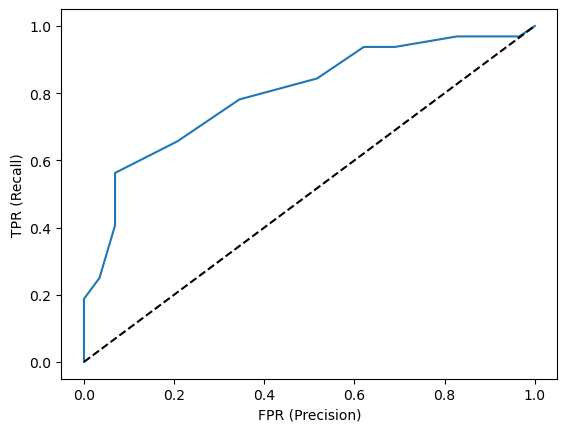

Area under curve:  0.7979525862068966


In [ ]:
# 20 Đánh giá mô hình thông qua đồ thị AUC-ROC (Cách đơn giản)
from sklearn.metrics import roc_curve, auc
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr, tpr)
plt.plot((0,1), ls='dashed', color='black')
plt.show()
print('Area under curve: ', auc(fpr, tpr))

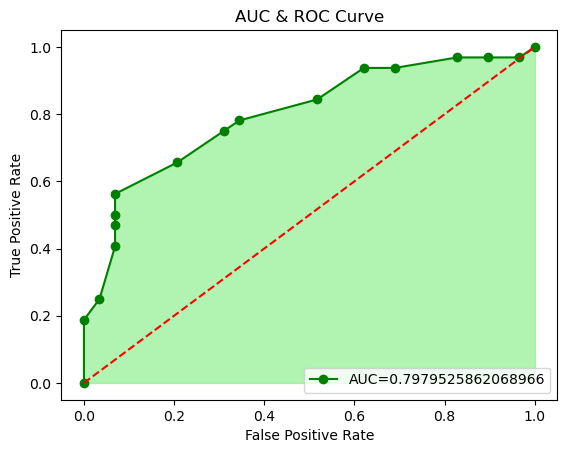

In [ ]:
# Đánh giá mô hình thông qua đồ thị AUC-ROC (Cách nâng cao)
from sklearn import metrics
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title('AUC & ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.7)
plt.show()

In [41]:
# 21. Hãy in ra màn hình accuracy, confusion matrix, [tn, fp, fn, tp], [TPR, FPR, TNR, FNR], [Precision, Recall, F1] và AUC-ROC
# với ngưỡng xac xuất phân lớp là 0.65
# Đưa ra kết luận khi thiết lập threshold tăng hoặc threshold giảm sẽ tác động như thế nào đến kêt quả đánh giá mô hình
# confusion matric với threshold = 0.65
from sklearn.metrics import confusion_matrix
cfmx065 = confusion_matrix(y_test, y_pred_test_new_065)
print(cfmx065)

[[27  2]
 [16 16]]


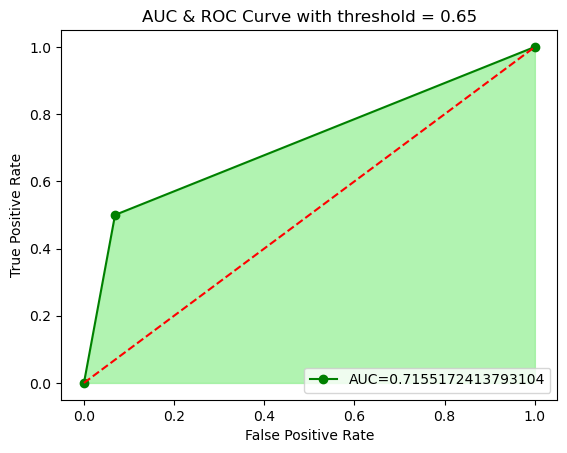

In [42]:
# AUC & ROC với threshold = 0.65
y_pred_proba = (knn.predict_proba(X_test)[:,1] >= 0.65).astype(float)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title('AUC & ROC Curve with threshold = 0.65')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.7)
plt.show()

In [43]:
# Test sample với threshold = 0.65
print('predicting sample with threshold = 0.65')
y_pred_test_new_065 = (knn.predict_proba([[47,0,0,150,250,0,1,140,1,0.5,1,0,2]])[:,1] >= 0.65).astype(float)
y_pred_test_new_065

predicting sample with threshold = 0.65


array([0.])

In [ ]:
# 22. Viết chương trình dự báo bệnh tim dưới dạng console application, cho phép người dùng nhập các đặc trưng đầu vào (feature input)
# và ngưỡng xác xuất(threshold, nếu không nhập thì mặc định là 0.5). Sau đó in kết quả chuẩn đoán bệnh tim
import pickle 
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'rb'))


